#Benötigte Pakete

In [ ]:
!pip install albumentations

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.6/922.6 kB 58.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 110.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 83.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 95.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [ ]:
import os
import shutil
import zipfile
import cv2
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import albumentations as A
from sklearn.model_selection import train_test_split
from collections import defaultdict

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Import der Rohdaten und Vorprozessierung

In [ ]:
# @title
def delete_folder(folder_path):
    """Löscht einen Ordner, falls er existiert.

    Args:
        folder_path: Der Pfad zum Ordner, der gelöscht werden soll.
    """

    if os.path.exists(folder_path):
        shutil.rmtree(folder_path)
        print(f"Ordner '{folder_path}' gelöscht.")
    else:
        print(f"Ordner '{folder_path}' existiert nicht.")

# Ordner löschen
delete_folder('/content/Datensatz_Augmentation')

Einlesen der Daten

In [ ]:
# @title
def unzip_from_drive(zip_file_path, extract_to='/content'):
  """Entpackt eine ZIP-Datei aus Google Drive.

  Args:
    zip_file_path: Der Pfad zur ZIP-Datei in Google Drive.
    extract_to: Der Pfad, in den die ZIP-Datei entpackt werden soll.
  """

  # Extrahiere den Dateinamen aus dem Pfad
  zip_file_name = os.path.basename(zip_file_path)

  # Kopiere die ZIP-Datei nach /content
  !cp "$zip_file_path" /content/

  # Entpacke die ZIP-Datei
  with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

  print(f"Datei '{zip_file_name}' aus Google Drive entpackt nach '{extract_to}'.")

# Beispielaufruf:
#zip_file_path = '/content/drive/MyDrive/Datensatz_Fonts.zip'  # Pfad zur ZIP-Datei in Google Drive
zip_file_path = '/content/drive/MyDrive/Mathestudium/Data Science MSc/Masterarbeit/Datensätze/Datensatz_Leserichtung.zip'  # Pfad zur ZIP-Datei in Google Drive
unzip_from_drive(zip_file_path)

Konvertierung in Greyscale

In [ ]:
def convert_to_grayscale(folder_path):
    """
    Konvertiert alle Bilder in einem Ordner in Graustufen.

    Args:
        folder_path: Der Pfad zum Ordner mit den Bildern.
    """

    for filename in os.listdir(folder_path):
        if filename.endswith(('.png', '.jpg', '.jpeg')):
            # Bild laden
            image_path = os.path.join(folder_path, filename)
            image = cv2.imread(image_path)

            # In Graustufen umwandeln
            gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

            # Bild speichern
            cv2.imwrite(image_path, gray_image)

# Beispielaufruf:
folder_path = '/content/Datensatz_Leserichtung'
convert_to_grayscale(folder_path)

print(f"Alle Bilder im Ordner '{folder_path}' wurden in Graustufen umgewandelt.")

Alle Bilder im Ordner '/content/Datensatz_Leserichtung' wurden in Graustufen umgewandelt.


Ausgabe von Beispielen

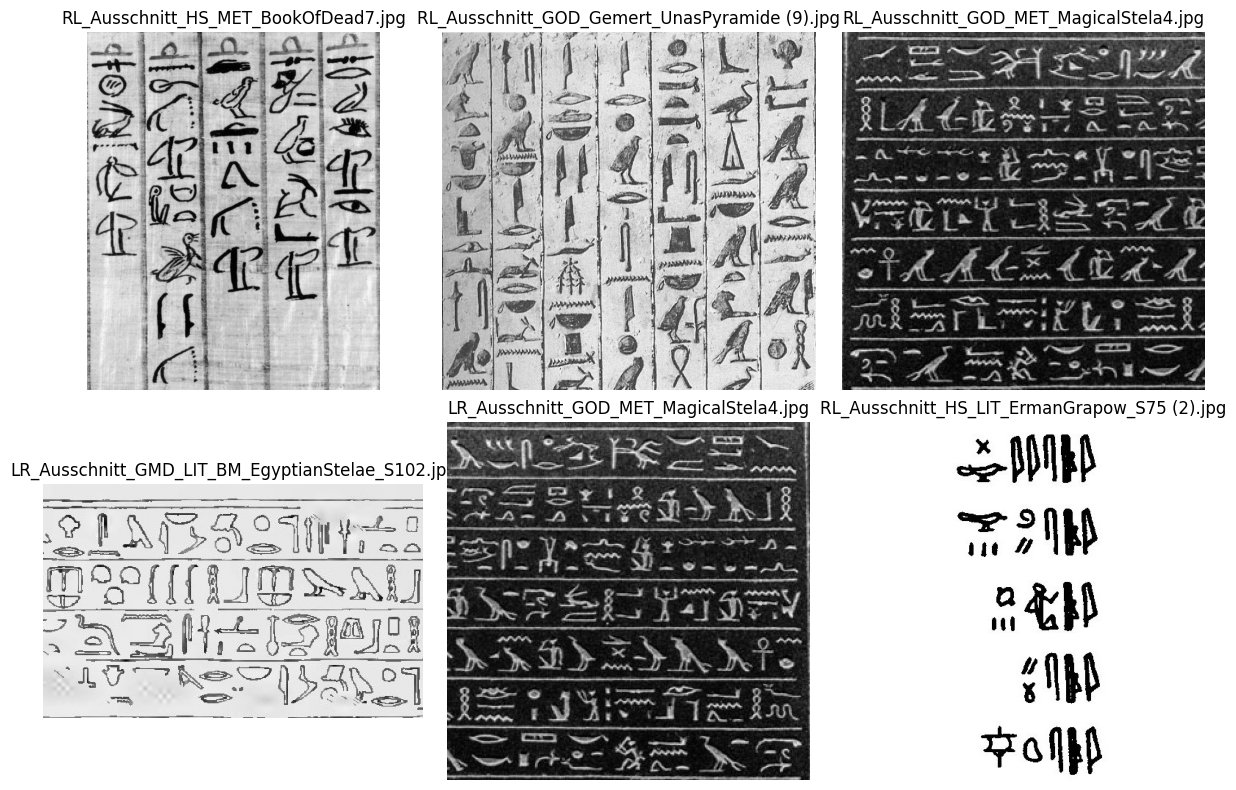

In [ ]:
# Definiere den Ordnerpfad
ordner_pfad = '/content/Datensatz_Leserichtung'

# Erhalte eine Liste aller Bilddateien im Ordner
bilddateien = [f for f in os.listdir(ordner_pfad) if os.path.isfile(os.path.join(ordner_pfad, f)) and f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Wähle 30 zufällige Bilddateien aus
ausgewaehlte_bilder = random.sample(bilddateien, min(6, len(bilddateien)))  # Begrenze auf 30 oder die Anzahl der verfügbaren Bilder

# Plotte die ausgewählten Bilder in einem 5x6-Grid
plt.figure(figsize=(12, 8))  # Passe die Figurengröße an
for i, bilddatei in enumerate(ausgewaehlte_bilder):
    bild_pfad = os.path.join(ordner_pfad, bilddatei)
    bild = mpimg.imread(bild_pfad)
    plt.subplot(2, 3, i + 1)  # 5 Zeilen, 6 Spalten für die Subplots
    plt.imshow(bild, cmap='gray')  # Zeige das Bild in Graustufen an
    plt.title(bilddatei)  # Zeige den Dateinamen als Titel
    plt.axis('off')  # Schalte die Achsen aus

plt.tight_layout()  # Optimiere den Abstand zwischen den Subplots
plt.show()  # Zeige die Plots an

Kopie des Ordners erstellen für Augmentation

In [ ]:
# Definiere die Pfade zu den Quell- und Zielordnern
quellordner = "/content/Datensatz_Leserichtung"
zielordner = "/content/Datensatz_Augmentation"

# Kopiere den gesamten Inhalt des Quellordners in den Zielordner
shutil.copytree(quellordner, zielordner, dirs_exist_ok=True)

print(f"Alle Elemente aus '{quellordner}' wurden nach '{zielordner}' kopiert.")

Definition des Transformers und Albumentations

In [ ]:
# Definiere die quellenspezifischen Transformer
transformers = {
    "Richtung": A.Compose([
        A.Blur(blur_limit=(1, 4), p=0.5),
        A.InvertImg(p=0.3),
        A.GridDistortion(distort_limit=(-0.3,0.3), p=0.5),
        A.RandomBrightnessContrast(brightness_limit=(-0.15,0.15),
            contrast_limit=(-0.3,0.3), p=1.0),
        A.RandomCropFromBorders(crop_left=0.1, crop_right=0.1, crop_top=0.1,
            crop_bottom=0.1, p=0.7),
        A.Rotate(limit=(-7,7), border_mode=cv2.BORDER_CONSTANT, fill=255, crop_border=False, p=0.3)
    ])
}

# Kopiere und transformiere die Bilder
for filename in os.listdir("/content/Datensatz_Augmentation"):

    if filename.endswith(".jpg"):
        source_path = os.path.join("/content/Datensatz_Augmentation", filename)

        # Anzahl der Kopien basierend auf Quelle und Klassenzählung bestimmen
        anzahl_kopien = 39 #50

        # Wende den quellenspezifischen Transformer an und erstelle Kopien
        image = cv2.imread(source_path)
        for i in range(anzahl_kopien):
            transformed = transformers['Richtung'](image=image)["image"]
            target_path = os.path.join("/content/Datensatz_Augmentation", f"{filename[:-4]}_aug_{i}.png")
            cv2.imwrite(target_path, transformed)

print("Augmentierung abgeschlossen.")

# 9 min

/usr/local/lib/python3.11/dist-packages/albumentations/augmentations/blur/functional.py:147: UserWarning: blur_limit: Invalid kernel size range (1, 4). Values less than 3 are not allowed. Range automatically adjusted to (3, 4).
  result = _ensure_min_value(result, min_value, info.field_name)
/usr/local/lib/python3.11/dist-packages/albumentations/augmentations/blur/functional.py:148: UserWarning: blur_limit: Non-zero kernel sizes must be odd. Range (3, 4) automatically adjusted to (3, 5).
  result = _ensure_odd_values(result, info.field_name)


Augmentierung abgeschlossen.


Ausgabe von Beispielen

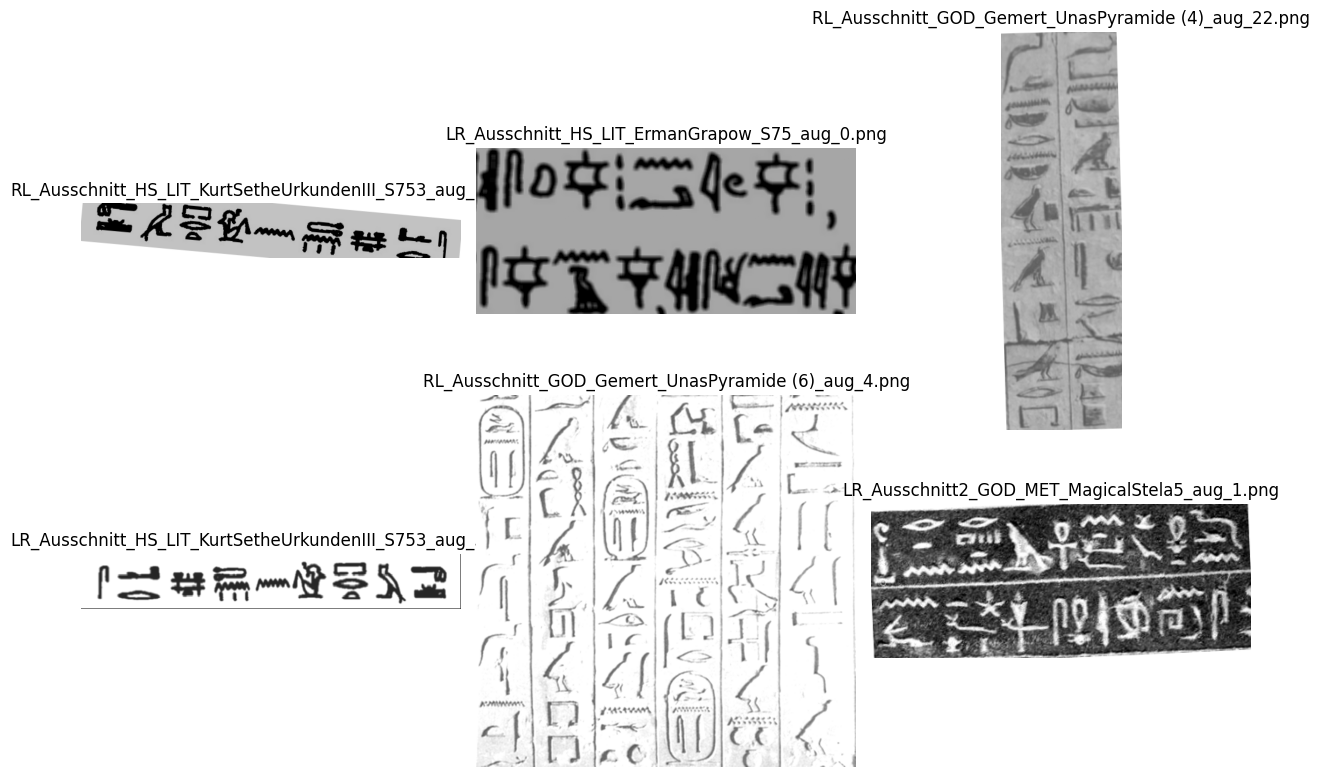

In [ ]:
# Definiere den Ordnerpfad
ordner_pfad = '/content/Datensatz_Augmentation'

# Erhalte eine Liste aller Bilddateien im Ordner
bilddateien = [f for f in os.listdir(ordner_pfad) if os.path.isfile(os.path.join(ordner_pfad, f)) and f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Wähle 30 zufällige Bilddateien aus
ausgewaehlte_bilder = random.sample(bilddateien, min(6, len(bilddateien)))  # Begrenze auf 30 oder die Anzahl der verfügbaren Bilder

# Plotte die ausgewählten Bilder in einem 5x6-Grid
plt.figure(figsize=(12, 8))  # Passe die Figurengröße an
for i, bilddatei in enumerate(ausgewaehlte_bilder):
    bild_pfad = os.path.join(ordner_pfad, bilddatei)
    bild = mpimg.imread(bild_pfad)
    plt.subplot(2, 3, i + 1)  # 5 Zeilen, 6 Spalten für die Subplots
    plt.imshow(bild, cmap='gray')  # Zeige das Bild in Graustufen an
    plt.title(bilddatei)  # Zeige den Dateinamen als Titel
    plt.axis('off')  # Schalte die Achsen aus

plt.tight_layout()  # Optimiere den Abstand zwischen den Subplots
plt.show()  # Zeige die Plots an

Zählung der Elemente

In [ ]:
def anzahl_elemente_im_ordner(ordner_pfad):
    """Gibt die Anzahl der Elemente in einem Ordner aus.

    Args:
        ordner_pfad: Der Pfad zum Ordner.
    """

    anzahl = len(os.listdir(ordner_pfad))
    print(f"Der Ordner '{ordner_pfad}' enthält {anzahl} Elemente.")

# Beispielaufruf:
ordner_pfad = '/content/Datensatz_Augmentation'
anzahl_elemente_im_ordner(ordner_pfad)

Der Ordner '/content/Datensatz_Augmentation' enthält 4400 Elemente.


Export des Ordners

In [ ]:
def download_folder(folder_path, output_filename):
  """
  Komprimiert einen Ordner und lädt ihn herunter.

  Args:
    folder_path: Der Pfad zum Ordner, der heruntergeladen werden soll.
    output_filename: Der Name der komprimierten Datei.
  """

  with zipfile.ZipFile(output_filename, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for root, _, files in os.walk(folder_path):
      for file in files:
        file_path = os.path.join(root, file)
        zipf.write(file_path, os.path.relpath(file_path, folder_path))

  #from google.colab import files
  #files.download(output_filename)

# Beispielaufruf:
folder_path = "/content/Datensatz_Augmentation" # Pfad zum Ordner, der heruntergeladen werden soll
output_filename = "Datensatz_Leserichtung_Aug.zip" # Name der komprimierten Datei
download_folder(folder_path, output_filename)

#Split in Trainings-, Validierungs- und Testdaten

In [ ]:
# Pfad zum Datensatz
data_dir = '/content/Datensatz_Augmentation'

# Leere Listen für Bildpfade und Labels
image_paths = []
labels = []

# Durchlaufe alle Dateien im Datensatzordner
for filename in os.listdir(data_dir):
    # Überprüfe, ob es sich um eine Bilddatei handelt
    if filename.endswith(('.png', '.jpg', '.jpeg')):
        # Extrahiere die Klasse aus dem Dateinamen
        label = filename.split('_')[0]

        # Überprüfe, ob das Label in der Liste gardinercodes_liste vorkommt
        if label in ['LR','RL']:
            # Füge den Bildpfad zur Liste hinzu
            image_paths.append(os.path.join(data_dir, filename))
            # Füge das Label zur Label-Liste hinzu
            labels.append(label)

# Teile die Daten in Trainings- und Testdaten auf
train_paths, test_paths, train_labels, test_labels = train_test_split(
    image_paths, labels, test_size=0.1, random_state=42  # 90:10 Aufteilung, zufälliger Seed für Reproduzierbarkeit
)

# Teile die Trainingsdaten in Trainings- und Validierungsdaten auf
train_paths, val_paths, train_labels, val_labels = train_test_split(
    train_paths, train_labels, test_size=0.111, random_state=42  # 80:10:10 Aufteilung, zufälliger Seed für Reproduzierbarkeit
)

# Gebe die Anzahl der Trainings-, Validierungs- und Testdaten aus
print(f"Anzahl Trainingsdaten: {len(train_paths)}")
print(f"Anzahl Validierungsdaten: {len(val_paths)}")
print(f"Anzahl Testdaten: {len(test_paths)}")

Anzahl Trainingsdaten: 3520
Anzahl Validierungsdaten: 440
Anzahl Testdaten: 440


Überführung in die für YOLO notwendige Ordnerstruktur

In [ ]:
def prepare_classification_data(image_paths, labels, output_dir, data_type='train'):
    """
    Prepares data for classification by organizing it into class-specific folders.
    Assumes data is already split into train/val/test.
    """
    # Create output directory
    os.makedirs(os.path.join(output_dir, data_type), exist_ok=True)

    # Group image paths by label
    images_by_label = defaultdict(list)
    for img_path, label in zip(image_paths, labels):
        images_by_label[label].append(img_path)

    # Copy images to class folders
    for label, img_paths in images_by_label.items():
        # Create class folder
        os.makedirs(os.path.join(output_dir, data_type, label), exist_ok=True)

        # Copy images to folder
        for img_path in img_paths:
            shutil.copy(img_path, os.path.join(output_dir, data_type, label, os.path.basename(img_path)))

# Example usage:
prepare_classification_data(image_paths=train_paths, labels=train_labels, output_dir='/content/classification_dataset', data_type='train')
prepare_classification_data(image_paths=val_paths, labels=val_labels, output_dir='/content/classification_dataset', data_type='val')
prepare_classification_data(image_paths=test_paths, labels=test_labels, output_dir='/content/classification_dataset', data_type='test')

#Modelltraining

In [ ]:
from ultralytics import YOLO

model = YOLO('yolo11n-cls.pt')  # Lade das vortrainierte YOLOv11-Klassifizierungsmodell (kleinste Variante)
model.model.nc = 2  # Setze die Anzahl der Klassen auf 2
model.model.names = ['LR','RL']  # Ersetze your_class_names mit einer Liste deiner Klassennamen

In [ ]:
model.train(data='/content/classification_dataset',
            fliplr=0.0, flipud=0.0, #Kein impliziter Flip!!
            epochs=10,
            batch=32,
            imgsz=640,
            optimizer='AdamW',
            lr0=0.01,  #Standard ist 0.01, bei Fortführung auf 1/10 reduzieren
            #lrf=1.0,
            #cos_lr = True,
            cache=True,
            cls=0.75,
            #cos_lr=True,
            #pretrained=False,
            weight_decay=0.02, #Standard ist 0.0005
            #dropout=0.3, #Standard ist 0.0
            #save_period=1,
            #resume=True,   # Für eine Fortsetzung des Trainings
            #warmup_epochs=0, # Für eine Fortführung des Trainings
            device=0)  #GPU
#Ca. 3:20 pro Epoche
#Auto-Modus für 60% GPU Speicherauslastung (batch=-1)

Ultralytics 8.3.86 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=classify, mode=train, model=yolo11n-cls.pt, data=/content/classification_dataset, epochs=10, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=True, device=0, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, s

train: Scanning /content/classification_dataset/train... 3520 images, 0 corrupt: 100%|██████████| 3520/3520 [00:17<00:00, 198.38it/s]


train: New cache created: /content/classification_dataset/train.cache
WARNING ⚠️ Classification `cache_ram` training has known memory leak in https://github.com/ultralytics/ultralytics/issues/9824, setting `cache_ram=False`.


val: Scanning /content/classification_dataset/val... 440 images, 0 corrupt: 100%|██████████| 440/440 [00:02<00:00, 177.40it/s]

val: New cache created: /content/classification_dataset/val.cache


optimizer: AdamW(lr=0.01, momentum=0.937) with parameter groups 39 weight(decay=0.0), 40 weight(decay=0.02), 40 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/classify/train2
Starting training for 10 epochs...

      Epoch    GPU_mem       loss  Instances       Size


       1/10      3.03G     0.7757         32        640:   2%|▏         | 2/110 [00:09<07:20,  4.07s/it]


100%|██████████| 755k/755k [00:00<00:00, 38.4MB/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:17<00:00,  2.50s/it]

                   all       0.77          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:17<00:00,  2.47s/it]

                   all      0.682          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:22<00:00,  3.17s/it]

                   all      0.855          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:20<00:00,  2.89s/it]

                   all      0.914          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:17<00:00,  2.54s/it]

                   all      0.961          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:17<00:00,  2.50s/it]

                   all      0.973          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:12<00:00,  1.83s/it]

                   all      0.957          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:13<00:00,  1.90s/it]

                   all      0.984          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:12<00:00,  1.80s/it]

                   all      0.982          1



      Epoch    GPU_mem       loss  Instances       Size


      10/10      3.01G     0.0625         32        640: 100%|██████████| 110/110 [03:12<00:00,  1.75s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:12<00:00,  1.72s/it]

                   all      0.984          1



10 epochs completed in 0.619 hours.
Optimizer stripped from runs/classify/train2/weights/last.pt, 3.2MB
Optimizer stripped from runs/classify/train2/weights/best.pt, 3.2MB

Validating runs/classify/train2/weights/best.pt...
Ultralytics 8.3.86 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n-cls summary (fused): 47 layers, 1,528,586 parameters, 0 gradients, 3.2 GFLOPs
train: /content/classification_dataset/train... found 3520 images in 2 classes ✅ 
val: /content/classification_dataset/val... found 440 images in 2 classes ✅ 
test: /content/classification_dataset/test... found 440 images in 2 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:22<00:00,  3.28s/it]


                   all      0.984          1
Speed: 0.6ms preprocess, 1.3ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train2


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7bf137fe4a10>
curves: []
curves_results: []
fitness: 0.9920454621315002
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.9840909242630005, 'metrics/accuracy_top5': 1.0, 'fitness': 0.9920454621315002}
save_dir: PosixPath('runs/classify/train2')
speed: {'preprocess': 0.5976596159081798, 'inference': 1.346995565908897, 'loss': 0.00020220682017679792, 'postprocess': 0.0004328272728509381}
task: 'classify'
top1: 0.9840909242630005
top5: 1.0

Speichern des Modells

In [ ]:
model.save('YOLO11n_Leserichtung_V2.pt')

Kurztest


0: 640x640 RL 1.00, LR 0.00, 11.4ms
Speed: 97.7ms preprocess, 11.4ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)


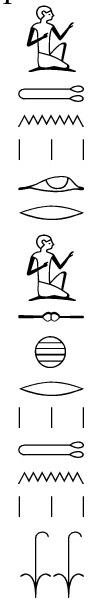

['RL']


In [ ]:
from IPython.display import display, Image
from ultralytics import YOLO
from google.colab.patches import cv2_imshow

#bild_pfad = "/content/drive/MyDrive/Mathestudium/Data Science MSc/Masterarbeit/Datensätze/Test/Hiero4.JPG"
bild_pfad = "/content/drive/MyDrive/Mathestudium/Data Science MSc/Masterarbeit/Datensätze/Datensatz_Leserichtung/RL_Ausschnitt_CG_WerningPetamenophis_S69.jpg"

img = cv2.imread(bild_pfad)
# Lade das trainierte YOLO-Modell
#model = YOLO('/content/drive/MyDrive/YOLO Modelle/YOLO11m_15_128_01_000001.pt')

# Liste zum Speichern der vorhergesagten Klassen
predicted_classes = []

# Führen Sie die Inferenz mit Ihrem YOLO-Modell durch
results = model.predict(img)
cv2_imshow(img)

# Extrahieren Sie die vorhergesagte Klasse
predicted_class_index = results[0].probs.top1
predicted_class = model.names[predicted_class_index]

# Fügen Sie die vorhergesagte Klasse zur Liste hinzu
predicted_classes.append(predicted_class)

# Geben Sie die Liste der vorhergesagten Klassen aus
print(predicted_classes)
